In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr
import requests_cache
session = requests_cache.CachedSession()
import scipy.optimize as sco
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm #pip install statsmodels --upgrade 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import norm
import pandas_datareader.data as web
import arch as arch
from arch import arch_model
pd.set_option('display.float_format', '{:.4f}'.format)
%precision 2
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Change in price of BTC base in USD')

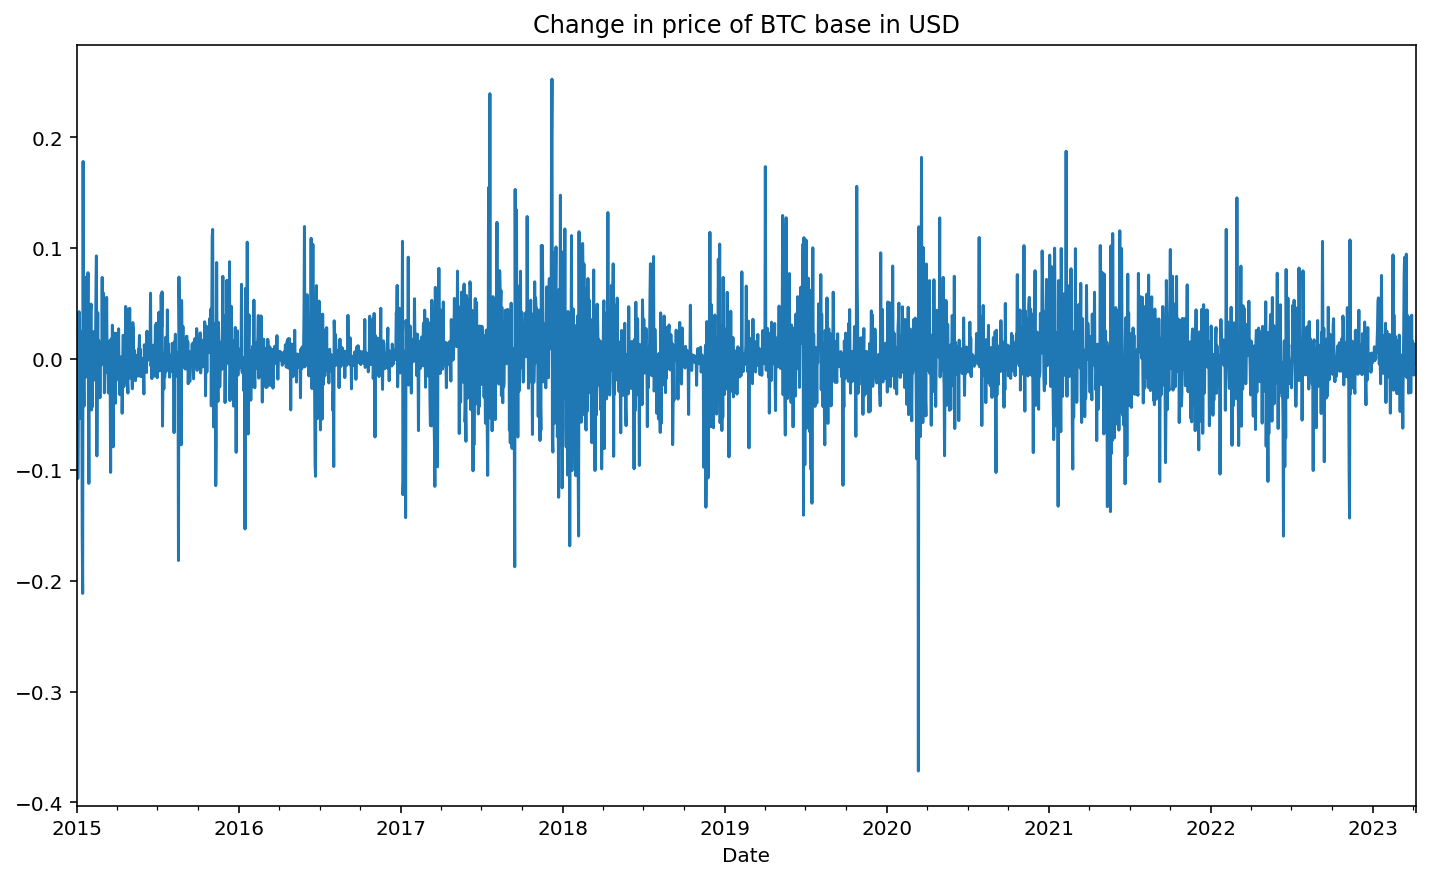

In [31]:
# Import Bitcoin based in USD
tickers = 'BTC-USD '
matana = (
    yf.download(tickers=tickers, progress=False)
    .assign(Date=lambda x: x.index.tz_localize(None))
    .set_index('Date')
    .rename_axis(columns=['Ticker'])
)
returns_1 = matana['Adj Close'].pct_change().loc['2015':]
matana['return']=returns_1
# Plot the return
returns_1.plot(figsize=(12,7))
plt.title('Change in price of BTC base in USD')

ADF Statistic: -1.5314271738006127
p-value: 0.5179114689991147


/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3018
Model:                 ARIMA(2, 2, 1)   Log Likelihood                5139.267
Date:                Thu, 06 Apr 2023   AIC                         -10270.533
Time:                        21:06:17   BIC                         -10246.486
Sample:                             0   HQIC                        -10261.886
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6908      0.011    -60.315      0.000      -0.713      -0.668
ar.L2         -0.3458      0.012    -28.626      0.000      -0.369      -0.322
ma.L1         -0.9999      0.068    -14.652      0.0

Text(0.5, 1.0, 'ARIMA Model')

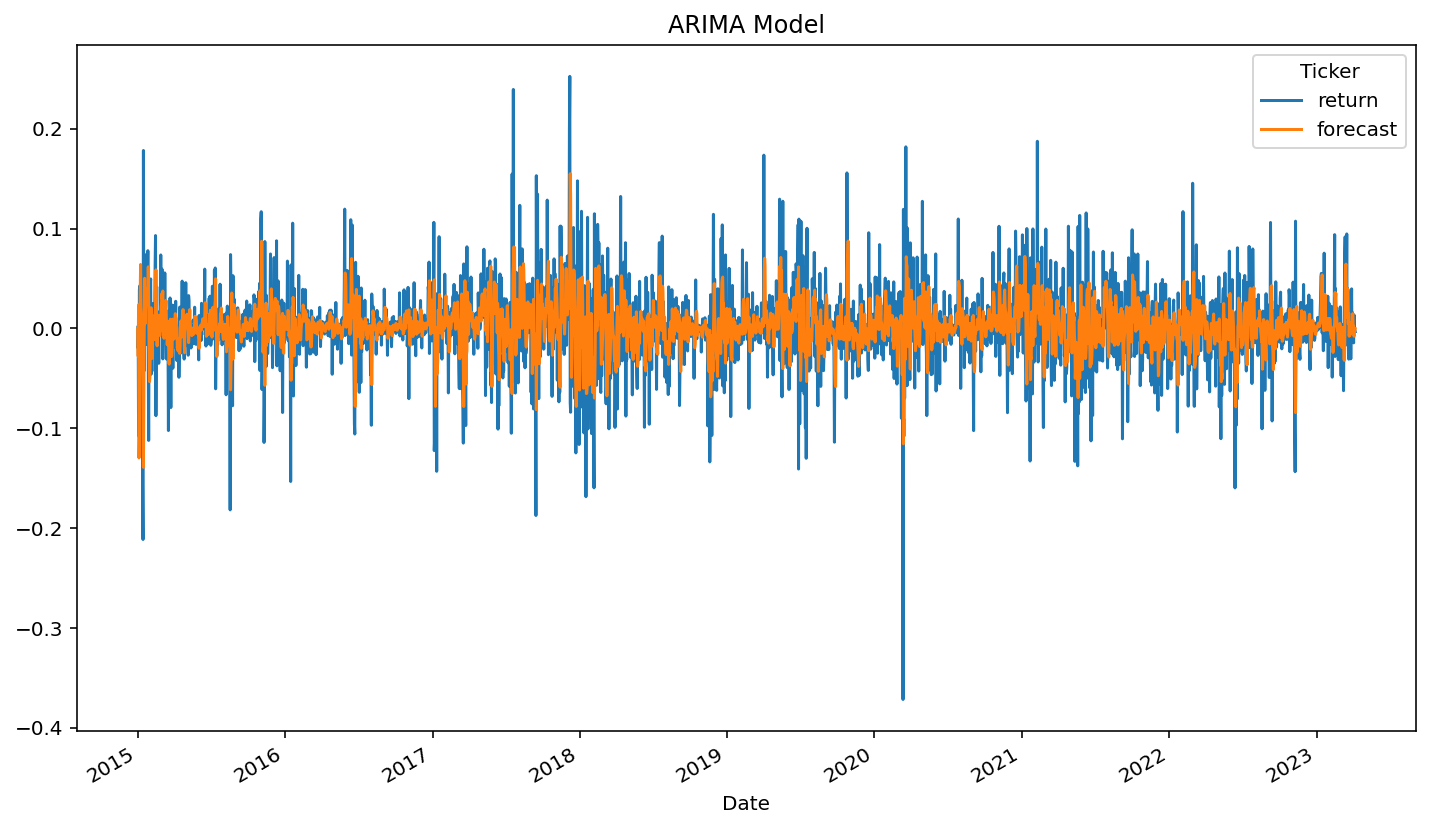

In [4]:
# 1. Model ARIMA
# Order of differencing
result = adfuller(matana['Adj Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
diff = matana['Adj Close'].diff().dropna()
#plot_acf(diff)
#plot_pacf(diff)
#plt.show()
# Apply model: one autoregressive, one differencing, and one moving average
model = sm.tsa.arima.ARIMA(returns_1, order=(2,2,1))
results = model.fit()
print(results.summary())
matana['forecast']=results.predict()
matana[['return','forecast']].plot(figsize=(12,7))
plt.title('ARIMA Model')

In [7]:
# 2. Garch Model
garch11_bitcoin = arch_model(returns_1.dropna()*100, p=1, q=1)
res_bitcoin = garch11_bitcoin.fit(update_freq=10)
print(res_bitcoin.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 8074.491992409081
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8074.49
Distribution:                  Normal   AIC:                           16157.0
Method:            Maximum Likelihood   BIC:                           16181.0
                                        No. Observations:                 3018
Date:                Thu, Apr 06 2023   Df Residuals:                     3017
Time:                        21:09:15   Df Model:                            1
                               Mean Model                               
         

In [5]:
# 3. Machine Learning model (New)
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier #pip install xgboost
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

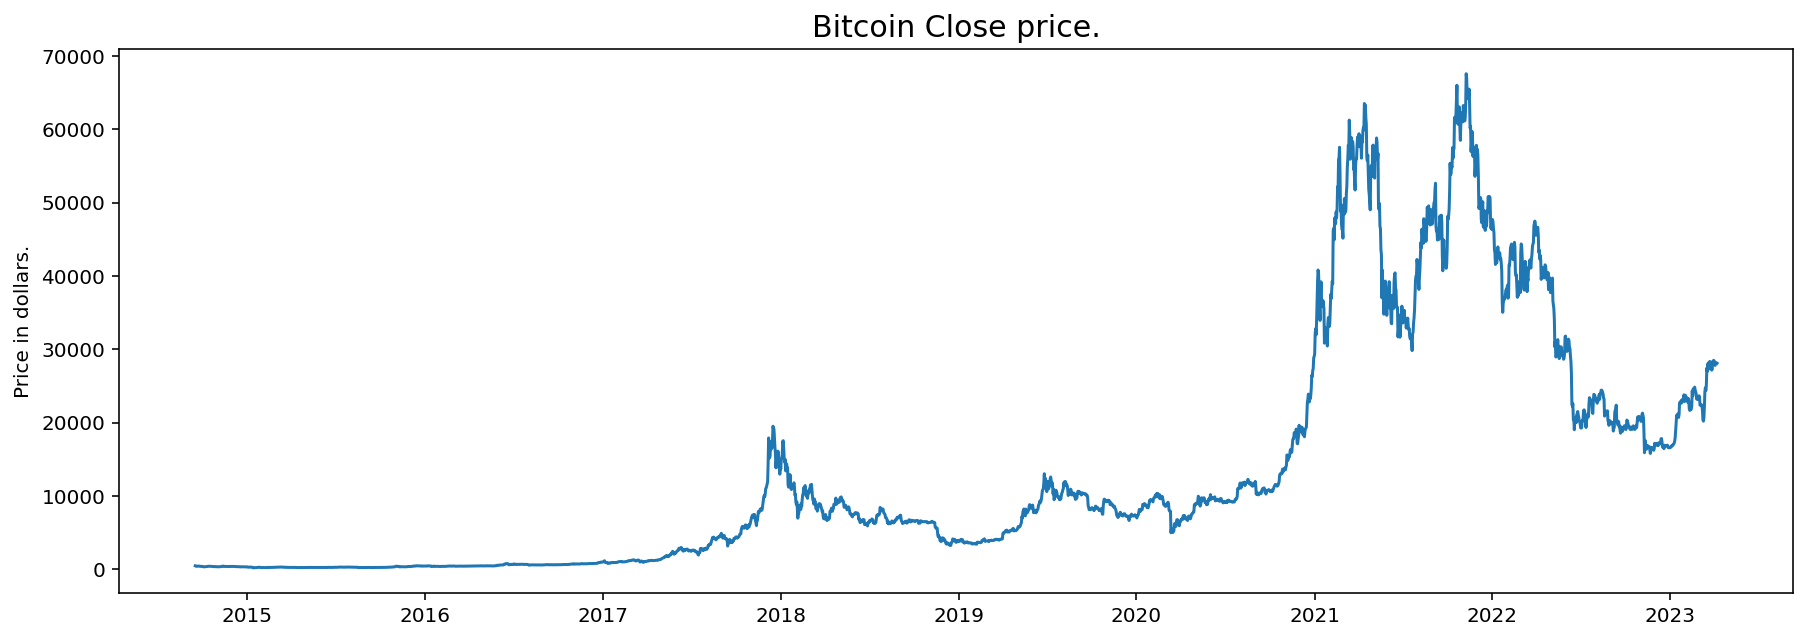

In [9]:
# Close data
plt.figure(figsize=(15, 5))
plt.plot(matana['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

Distribution plot of the OHLC data


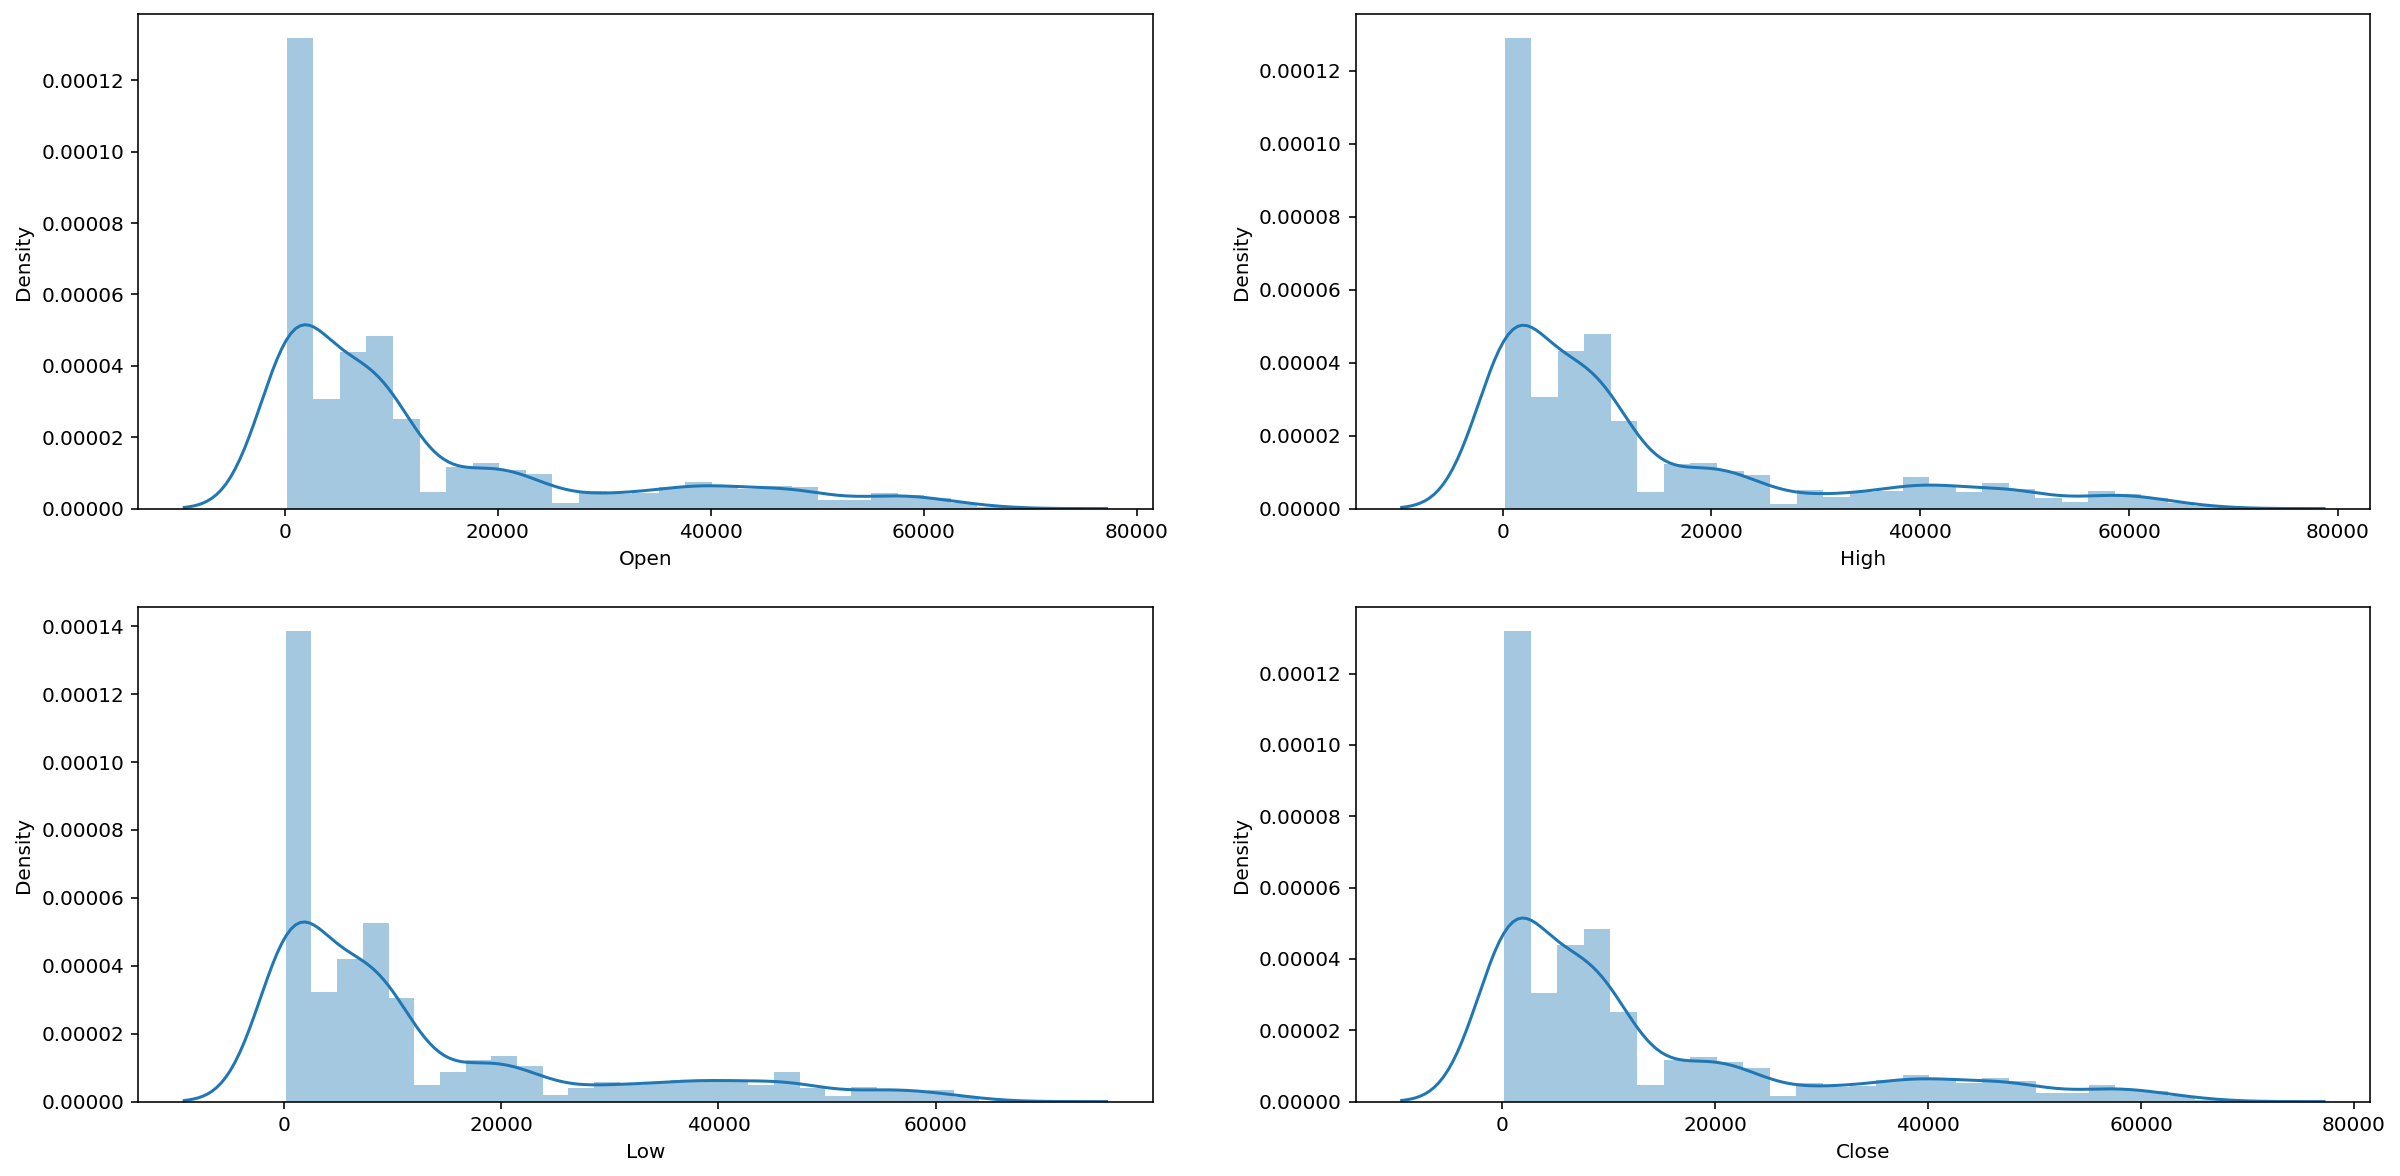

Boxplot of the OHLC data


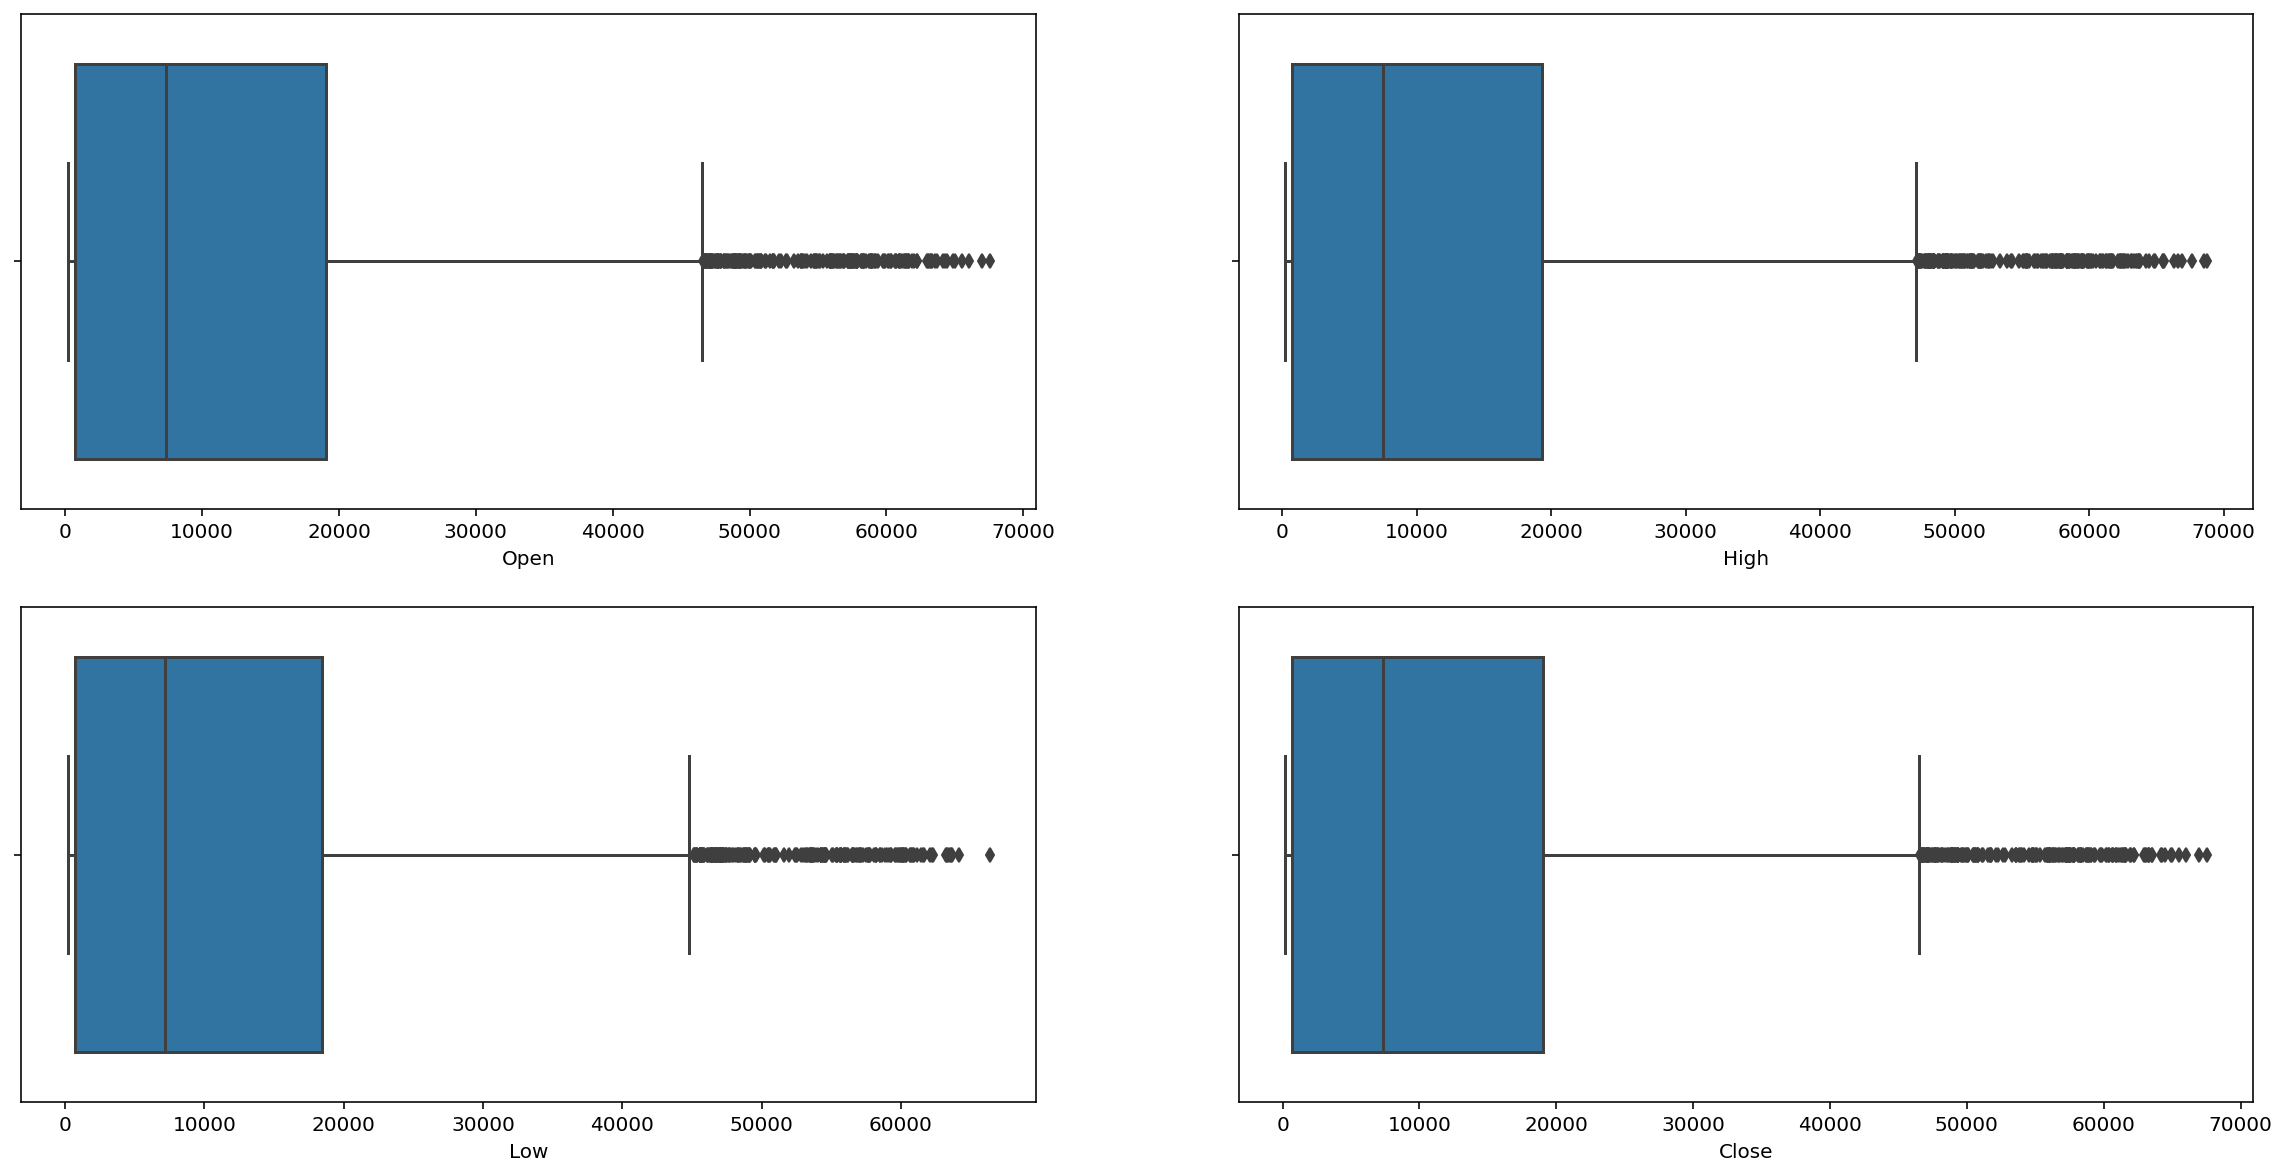

In [16]:
# Distribution plot of the OHLC data
features = ['Open', 'High', 'Low', 'Close']
print('Distribution plot of the OHLC data')

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(matana[col])
plt.show()

# Boxplot of the OHLC data
print('Boxplot of the OHLC data')
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.boxplot(matana[col])
plt.show()

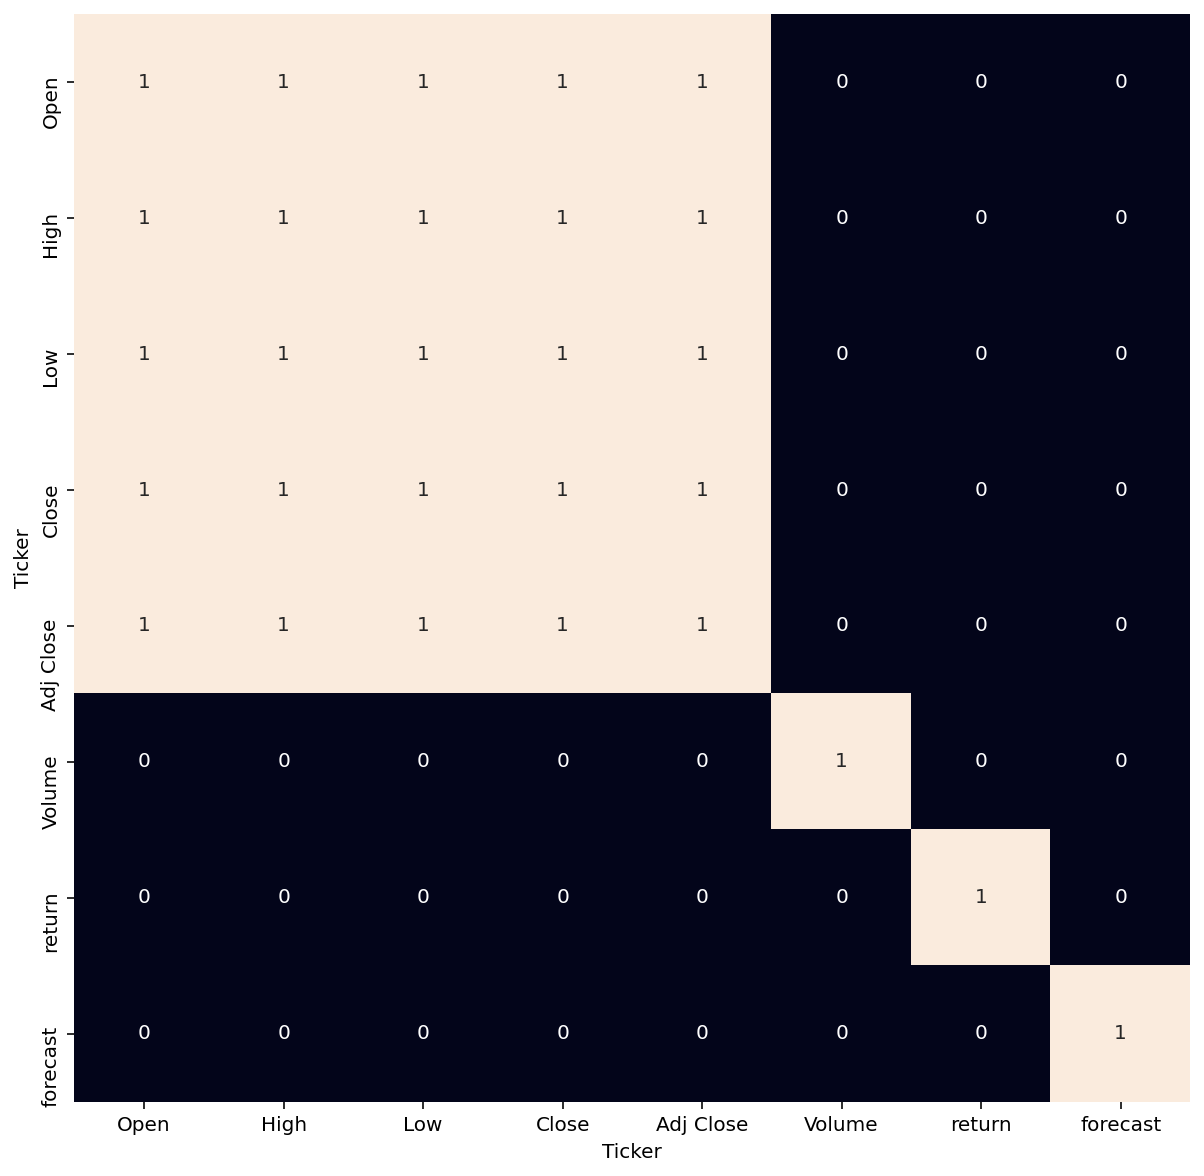

In [17]:
# Heat map
plt.figure(figsize=(10, 10))
# As our concern is with the highly correlated features only so
sb.heatmap(matana.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated

In [44]:
btc = pd.read_csv('BTC.csv')

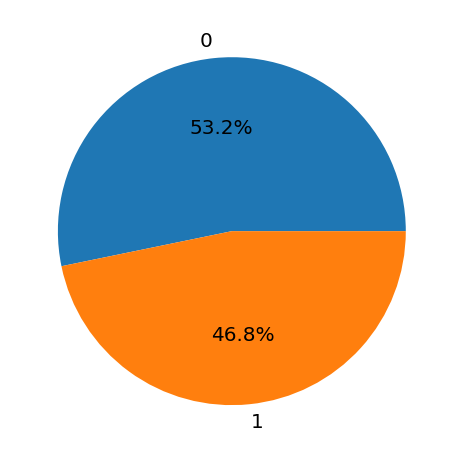

In [50]:
splitted = btc['Date'].str.split('/', expand=True)
# split data
btc['year'] = splitted[0].astype('int')
btc['month'] = splitted[1].astype('int')
btc['day'] = splitted[2].astype('int')

# Prepare the training of our model
btc['is_quarter_end'] = np.where(btc['month']%3==0,1,0)
btc['open-close']  = btc['Open'] - btc['Close']
btc['low-high']  = btc['Low'] - btc['High']
# target is a signal whether to buy or not
btc['target'] = np.where(btc['Close'].shift(-1) > btc['Close'], 1, 0)

# Check No correlated features 
plt.pie(btc['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [53]:
# Training Size
features = btc[['open-close', 'low-high', 'is_quarter_end']]
target = btc['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2813, 3) (313, 3)


we normalize the date and split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

In [54]:
# Apply the model with LogisticRegression, SVC, XGBClassifier
# Performance of different state-of-the-art models.
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print('\n')

LogisticRegression() : 
Training Accuracy :  0.5296558035487315
Validation Accuracy :  0.48965742784727334


SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4626005389191113
Validation Accuracy :  0.5178235630774262


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Acc

Apply the machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier). For the evaluation metric, we will use the ROC-AUC curve, instead of hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

Result: Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.